In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import torch
import torchvision
import glob


# Apprentissage profond ou automatique? (ou aucun des deux?)

## profil du projet

blahblah

## données

blahblah

## hardware

blahblah

# Jeu de données et prétraitement

blahblah

## Se familiariser avec les données

In [2]:
train_path = "./actin/train"
test_path = "./actin/test"

### Visualisation

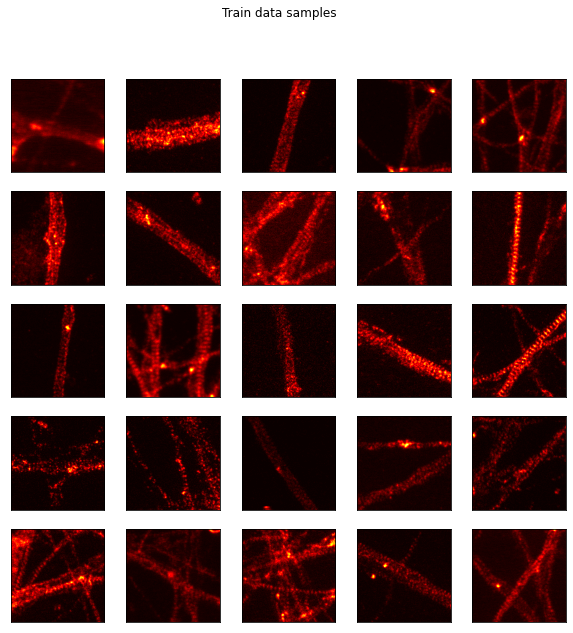

In [3]:
train_files = glob.glob(f"{train_path}/*.npz")
test_files = glob.glob(f"{test_path}/*.npz")
Ntrain = len(train_files)
Ntest = len(test_files)
fig, axs = plt.subplots(5,5, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    randidx = np.random.randint(0, Ntrain)
    img = np.load(train_files[randidx])['arr_0']
    ax.imshow(img, cmap='hot')
    ax.set_xticks([])
    ax.set_yticks([])
fig.suptitle("Train data samples")
plt.show()

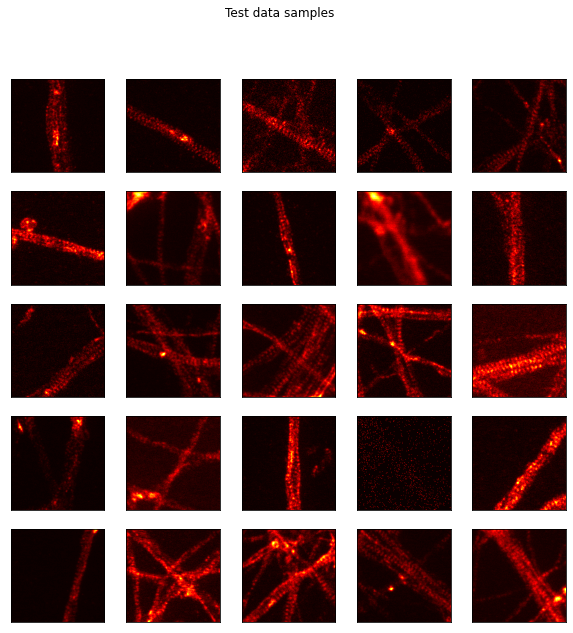

In [4]:
fig, axs = plt.subplots(5,5, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    randidx = np.random.randint(0, Ntest)
    img = np.load(test_files[randidx])['arr_0']
    ax.imshow(img, cmap='hot')
    ax.set_xticks([])
    ax.set_yticks([])
fig.suptitle("Test data samples")
plt.show()

In [5]:
random_img = np.load(train_files[np.random.randint(0, Ntrain)])["arr_0"]
print(f"Max pixel value: {random_img.max()}")
print(f"Min pixel value: {random_img.min()}")
print(f"Mean pixel value: {random_img.mean()}")
print(f"Pixel data type: {random_img.dtype}")
print(f"Image shape: {random_img.shape}")

Max pixel value: 0.502571165561676
Min pixel value: 0.5000076293945312
Mean pixel value: 0.500291645526886
Pixel data type: float32
Image shape: (224, 224)


Notice the very small difference between min and max pixel values:

In [6]:
print(f"Difference: {random_img.max() - random_img.min()}")

Difference: 0.0025635361671447754


We may want to normalize our images in a more suitable range

In [7]:
def normalize(img, maxval=1):
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    if maxval == 255:
        return np.uint8(img * 255)
    else:
        return img

normalized1_img = normalize(random_img)
print(f"Max pixel value: {normalized1_img.max()}")
print(f"Min pixel value: {normalized1_img.min()}")
print(f"Difference: {normalized1_img.max() - normalized1_img.min()}\n")

normalized255_img = normalize(random_img, maxval=255)
print(f"Max pixel value: {normalized255_img.max()}")
print(f"Min pixel value: {normalized255_img.min()}")
print(f"Difference: {normalized255_img.max() - normalized255_img.min()}")

Max pixel value: 1.0
Min pixel value: 0.0
Difference: 1.0

Max pixel value: 255
Min pixel value: 0
Difference: 255


Why is this important? Imagine we apply some operation to our images, say convert it from a numpy array to a Pillow Image, having no clue as to what our images look like, what their data types are, what range the pixels are in, etc..

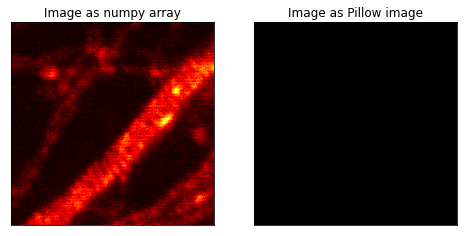

In [8]:
numpy_img = random_img
pil_img = Image.fromarray(random_img)
fig, axs = plt.subplots(1, 2, figsize=(8,8))
axs[0].imshow(numpy_img, cmap='hot')
axs[0].set_title('Image as numpy array')
axs[1].imshow(pil_img, cmap='hot')
axs[1].set_title('Image as Pillow image')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

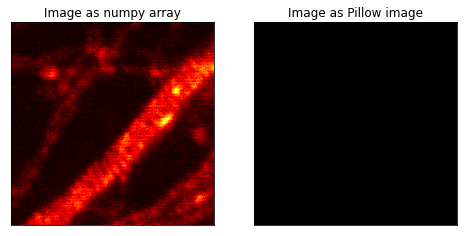

In [9]:
pil_img = Image.fromarray(normalized1_img)
fig, axs = plt.subplots(1, 2, figsize=(8,8))
axs[0].imshow(numpy_img, cmap='hot')
axs[0].set_title('Image as numpy array')
axs[1].imshow(pil_img, cmap='hot')
axs[1].set_title('Image as Pillow image')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

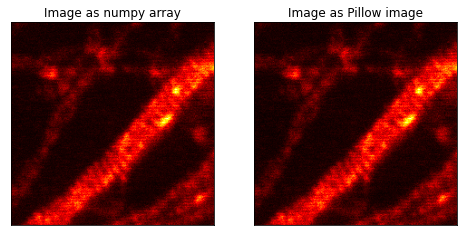

In [10]:
pil_img = Image.fromarray(normalized255_img)
fig, axs = plt.subplots(1, 2, figsize=(8,8))
axs[0].imshow(numpy_img, cmap='hot')
axs[0].set_title('Image as numpy array')
axs[1].imshow(pil_img, cmap='hot')
axs[1].set_title('Image as Pillow image')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

# Standardization

In [11]:
dataset = np.zeros(shape=(100, 5))
for i in range(dataset.shape[1] - 1):
    dataset[:, i] = np.random.uniform(0, 20, 100)
dataset[:, 4] = np.random.uniform(0, 200, 100)
dataset[0] = [10, 10, 10, 10, 80]
dataset[1] = [10, 10, 10, 10, 150]
dataset[2] = [1, 19, 1, 19, 130]

print(np.linalg.norm(dataset[0] - dataset[1]))
print(np.linalg.norm(dataset[0] - dataset[2]))

70.0
53.14132102234569


In [12]:
from sklearn.preprocessing import StandardScaler
scaled_dataset = StandardScaler().fit_transform(dataset)
print(np.linalg.norm(scaled_dataset[0] - scaled_dataset[1]))
print(np.linalg.norm(scaled_dataset[0] - scaled_dataset[2]))

1.2412132684625494
3.27826355555321


## Fractionnement du jeu de données

### Small data regime

blahblah

### Big data regime

blahblah

## Common pitfalls when splitting data

# Performance Evaluation

# Error Analysis